<a href="https://colab.research.google.com/github/samirsarkardk/demo/blob/main/sin(x)_Approximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding the Backpropagation Clearly

Input (x):
 [0.         0.33333333 0.66666667 1.         1.33333333 1.66666667
 2.         2.33333333 2.66666667 3.        ]
Target (y):
 [1.         1.66666667 2.33333333 3.         3.66666667 4.33333333
 5.         5.66666667 6.33333333 7.        ]
Predicted (y_hat):
 [1.11605229 1.65191571 2.25979654 2.92669617 3.63384722 4.3573826
 5.06992301 5.74378007 6.35523761 6.88824014]
Final Loss: 0.0049928086610181825


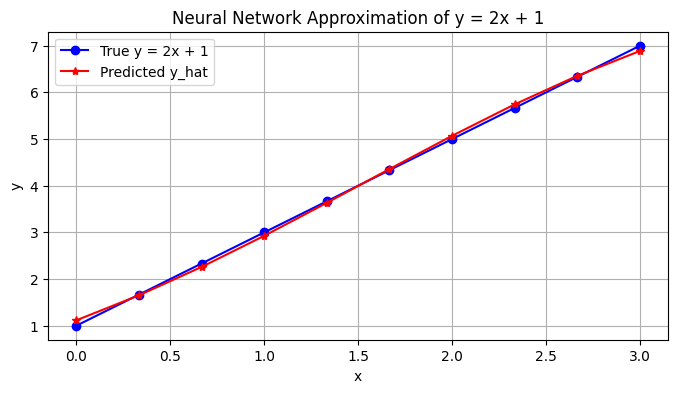

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Activation function: sigmoid and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    # x should be sigmoid(x) already
    return x * (1 - x)

# Create training data (10 points): y = 2x + 1
X = np.linspace(0, 3, 10).reshape(-1, 1)     # Shape: (10, 1)
y = 2 * X + 1                                # Shape: (10, 1)

# Network architecture
input_size = 1
hidden_size = 4
output_size = 1

# Initialize weights and biases
np.random.seed(42)  # For reproducibility

w1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
w2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Training parameters
learning_rate = 0.1
epochs = 1000

# Training loop
for epoch in range(epochs):
    # === Forward pass ===
    z1 = np.dot(X, w1) + b1          # Hidden layer linear step
    a1 = sigmoid(z1)                 # Hidden layer activation
    z2 = np.dot(a1, w2) + b2         # Output layer linear step
    y_pred = z2                      # Output (no activation for regression)

    # === Loss computation (Mean Squared Error) ===
    loss = np.mean((y_pred - y) ** 2)

    # === Backward pass ===
    # Derivative of loss w.r.t y_pred
    d_loss_y_pred = 2 * (y_pred - y) / y.shape[0]

    # Output layer gradients
    d_z2 = d_loss_y_pred
    d_w2 = np.dot(a1.T, d_z2)
    d_b2 = np.sum(d_z2, axis=0, keepdims=True)

    # Hidden layer gradients
    d_a1 = np.dot(d_z2, w2.T)
    d_z1 = d_a1 * sigmoid_derivative(a1)
    d_w1 = np.dot(X.T, d_z1)
    d_b1 = np.sum(d_z1, axis=0, keepdims=True)

    # === Update weights and biases ===
    w2 -= learning_rate * d_w2
    b2 -= learning_rate * d_b2
    w1 -= learning_rate * d_w1
    b1 -= learning_rate * d_b1

# === Final predictions ===
final_output = y_pred

# === Show result ===
print("Input (x):\n", X.flatten())
print("Target (y):\n", y.flatten())
print("Predicted (y_hat):\n", final_output.flatten())
print("Final Loss:", loss)

plt.figure(figsize=(8, 4))
plt.plot(X, y, 'bo-', label='True y = 2x + 1')
plt.plot(X, final_output, 'r*-', label='Predicted y_hat')
plt.title("Neural Network Approximation of y = 2x + 1")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# Sin(x) Approximation

Epoch 0, Loss = 7.786480
Epoch 200, Loss = 0.016256
Epoch 400, Loss = 0.011263
Epoch 600, Loss = 0.010260
Epoch 800, Loss = 0.009541


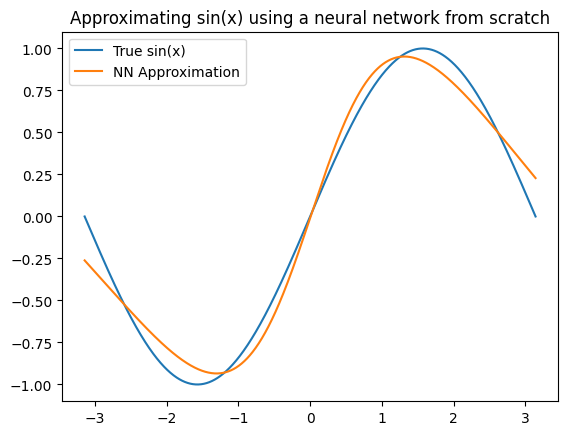

R² Score = 0.982142
0.5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate Data
np.random.seed(42)
x = np.linspace(-np.pi, np.pi, 1000).reshape(-1, 1)
y = np.sin(x)

# 2. Initialize Network Parameters
input_size = 1
hidden_size = 16
output_size = 1
lr = 0.1  # learning rate

# Weights and biases
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Activation functions
class Activation:
  def tanh(self,z):
    return np.tanh(z)
  def tanh_derivative(self,z):
    return 1 - np.tanh(z)**2
  def sigmoid(self,x):
    return 1 / (1 + np.exp(-x))
  def sigmoid_derivative(self,x):
    return Activation().sigmoid(x) * (1-Activation().sigmoid(x))

# Loss function
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# 3. Training Loop
epochs = 1000
for epoch in range(epochs):
    # ---- Forward pass ----
    z1 = x @ W1 + b1
    a1 = Activation().sigmoid(z1)
    z2 = a1 @ W2 + b2
    y_pred = z2  # Linear output

    # ---- Loss ----
    loss = mse_loss(y, y_pred)

    # ---- Backward pass ----
    dloss_dy = 2 * (y_pred - y) / y.shape[0]  # Derivative of MSE

    # Gradients for W2 and b2
    dW2 = a1.T @ dloss_dy
    db2 = np.sum(dloss_dy, axis=0, keepdims=True)

    # Backprop to hidden layer
    da1 = dloss_dy @ W2.T
    dz1 = da1 * Activation().sigmoid_derivative(z1)

    # Gradients for W1 and b1
    dW1 = x.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # ---- Update weights ----
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

    # ---- Print loss ----
    if epoch % 200 == 0:
        print(f"Epoch {epoch}, Loss = {loss:.6f}")

# 4. Plot Results
plt.plot(x, y, label='True sin(x)')
plt.plot(x, y_pred, label='NN Approximation')
plt.legend()
plt.title("Approximating sin(x) using a neural network from scratch")
plt.show()
# R² score
ss_res = np.sum((y - y_pred)**2)
ss_tot = np.sum((y - np.mean(y))**2)
r2_score = 1 - (ss_res / ss_tot)

print(f"R² Score = {r2_score:.6f}")

a= Activation()
print(a.sigmoid(0))

Epoch 0, Loss = 0.960232
Epoch 500, Loss = 0.023387
Epoch 1000, Loss = 0.012007
Epoch 1500, Loss = 0.008718


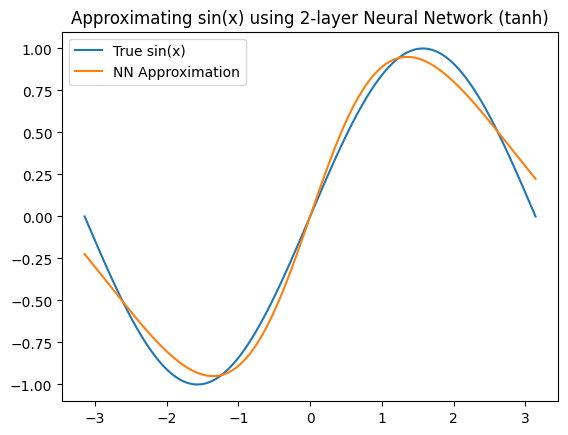

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate Data
np.random.seed(42)
x = np.linspace(-np.pi, np.pi, 2000).reshape(-1, 1)
y = np.sin(x)

# 2. Initialize Network Parameters
input_size = 1
hidden_size1 = 32
hidden_size2 = 16
output_size = 1
lr = 0.01  # learning rate

# Xavier initialization for tanh
def xavier_init(fan_in, fan_out):
    limit = np.sqrt(6 / (fan_in + fan_out))
    return np.random.uniform(-limit, limit, size=(fan_in, fan_out))

# Weights and biases
W1 = xavier_init(input_size, hidden_size1)
b1 = np.zeros((1, hidden_size1))

W2 = xavier_init(hidden_size1, hidden_size2)
b2 = np.zeros((1, hidden_size2))

W3 = xavier_init(hidden_size2, output_size)
b3 = np.zeros((1, output_size))


# Activation function and its derivative
class Activation:
  def tanh(self,z):
    return np.tanh(z)
  def tanh_derivative(self,z):
    return 1 - np.tanh(z)**2
  def sigmoid(self,x):
    return 1 / (1 + np.exp(-x))
  def sigmoid_derivative(self,x):
    return Activation().sigmoid(x) * (1-Activation().sigmoid(x))

# Loss function
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# 3. Training Loop
epochs = 2000
for epoch in range(epochs):
    # ---- Forward pass ----
    a = Activation()
    z1 = x @ W1 + b1
    a1 = a.tanh(z1)

    z2 = a1 @ W2 + b2
    a2 = a.tanh(z2)

    z3 = a2 @ W3 + b3
    y_pred = z3  # Linear output

    # ---- Loss ----
    loss = mse_loss(y, y_pred)

    # ---- Backward pass ----
    dloss_dy = 2 * (y_pred - y) / y.shape[0]  # Derivative of MSE

    # Output layer gradients
    dW3 = a2.T @ dloss_dy
    db3 = np.sum(dloss_dy, axis=0, keepdims=True)

    # Hidden layer 2
    da2 = dloss_dy @ W3.T
    dz2 = da2 * a.tanh_derivative(z2)
    dW2 = a1.T @ dz2
    db2 = np.sum(dz2, axis=0, keepdims=True)

    # Hidden layer 1
    da1 = dz2 @ W2.T
    dz1 = da1 * a.tanh_derivative(z1)
    dW1 = x.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # ---- Update weights ----
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2
    W3 -= lr * dW3
    b3 -= lr * db3

    # ---- Print loss ----
    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss = {loss:.6f}")

# 4. Plot Results
plt.plot(x, y, label='True sin(x)')
plt.plot(x, y_pred, label='NN Approximation')
plt.legend()
plt.title("Approximating sin(x) using 2-layer Neural Network (tanh)")
plt.show()



Epoch 0, Loss = 0.718711
Epoch 500, Loss = 0.023631
Epoch 1000, Loss = 0.012153
Epoch 1500, Loss = 0.008475


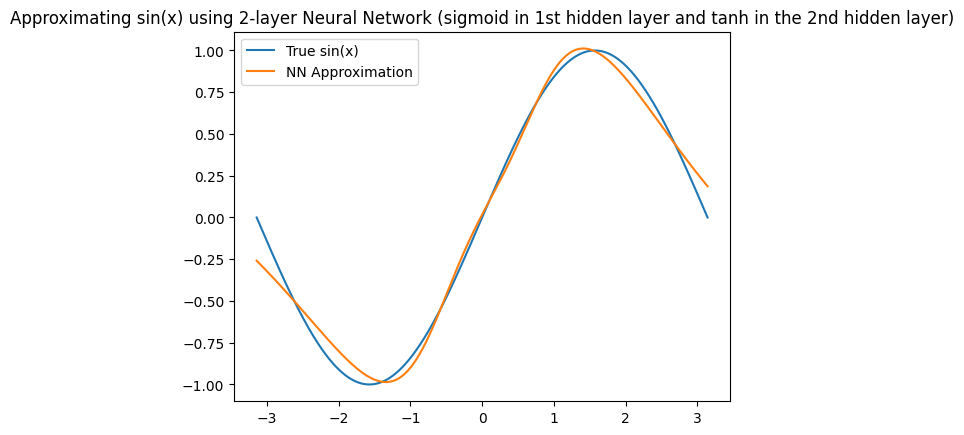

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate Data
np.random.seed(42)
x = np.linspace(-np.pi, np.pi, 2000).reshape(-1, 1)
y = np.sin(x)

# 2. Initialize Network Parameters
input_size = 1
hidden_size1 = 32
hidden_size2 = 16
output_size = 1
lr = 0.1  # learning rate

# Xavier initialization for tanh
def xavier_init(fan_in, fan_out):
    limit = np.sqrt(6 / (fan_in + fan_out))
    return np.random.uniform(-limit, limit, size=(fan_in, fan_out))

# Weights and biases
W1 = xavier_init(input_size, hidden_size1)
b1 = np.zeros((1, hidden_size1))

W2 = xavier_init(hidden_size1, hidden_size2)
b2 = np.zeros((1, hidden_size2))

W3 = xavier_init(hidden_size2, output_size)
b3 = np.zeros((1, output_size))


# Activation function and its derivative
class Activation:
  def tanh(self,z):
    return np.tanh(z)
  def tanh_derivative(self,z):
    return 1 - np.tanh(z)**2
  def sigmoid(self,x):
    return 1 / (1 + np.exp(-x))
  def sigmoid_derivative(self,x):
    return Activation().sigmoid(x) * (1-Activation().sigmoid(x))

# Loss function
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# 3. Training Loop
epochs = 2000
for epoch in range(epochs):
    # ---- Forward pass ----
    a = Activation()
    z1 = x @ W1 + b1
    a1 = a.sigmoid(z1)

    z2 = a1 @ W2 + b2
    a2 = a.tanh(z2)

    z3 = a2 @ W3 + b3
    y_pred = z3  # Linear output

    # ---- Loss ----
    loss = mse_loss(y, y_pred)

    # ---- Backward pass ----
    dloss_dy = 2 * (y_pred - y) / y.shape[0]  # Derivative of MSE

    # Output layer gradients
    dW3 = a2.T @ dloss_dy
    db3 = np.sum(dloss_dy, axis=0, keepdims=True)

    # Hidden layer 2
    da2 = dloss_dy @ W3.T
    dz2 = da2 * a.tanh_derivative(z2)
    dW2 = a1.T @ dz2
    db2 = np.sum(dz2, axis=0, keepdims=True)

    # Hidden layer 1
    da1 = dz2 @ W2.T
    dz1 = da1 * a.sigmoid_derivative(z1)
    dW1 = x.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # ---- Update weights ----
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2
    W3 -= lr * dW3
    b3 -= lr * db3

    # ---- Print loss ----
    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss = {loss:.6f}")

# 4. Plot Results
plt.plot(x, y, label='True sin(x)')
plt.plot(x, y_pred, label='NN Approximation')
plt.legend()
plt.title("Approximating sin(x) using 2-layer Neural Network (sigmoid in 1st hidden layer and tanh in the 2nd hidden layer)")
plt.show()



Epoch 0, Loss = 0.659809
Epoch 500, Loss = 0.106418
Epoch 1000, Loss = 0.025161
Epoch 1500, Loss = 0.017567


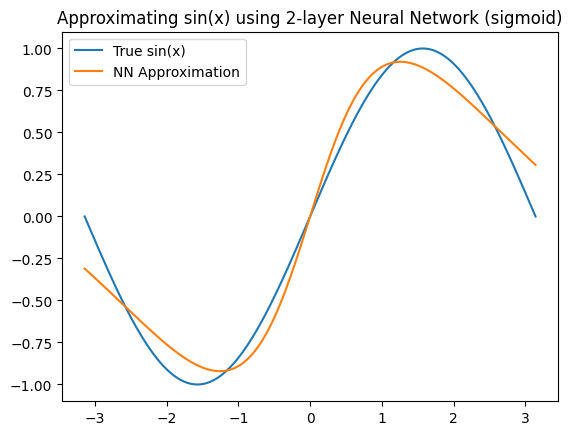

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate Data
np.random.seed(42)
x = np.linspace(-np.pi, np.pi, 2000).reshape(-1, 1)
y = np.sin(x)

# 2. Initialize Network Parameters
input_size = 1
hidden_size1 = 32
hidden_size2 = 16
output_size = 1
lr = 0.15  # learning rate

# Xavier initialization for tanh
def xavier_init(fan_in, fan_out):
    limit = np.sqrt(6 / (fan_in + fan_out))
    return np.random.uniform(-limit, limit, size=(fan_in, fan_out))

# Weights and biases
W1 = xavier_init(input_size, hidden_size1)
b1 = np.zeros((1, hidden_size1))

W2 = xavier_init(hidden_size1, hidden_size2)
b2 = np.zeros((1, hidden_size2))

W3 = xavier_init(hidden_size2, output_size)
b3 = np.zeros((1, output_size))


# Activation function and its derivative
class Activation:
  def tanh(self,z):
    return np.tanh(z)
  def tanh_derivative(self,z):
    return 1 - np.tanh(z)**2
  def sigmoid(self,x):
    return 1 / (1 + np.exp(-x))
  def sigmoid_derivative(self,x):
    return Activation().sigmoid(x) * (1-Activation().sigmoid(x))

# Loss function
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# 3. Training Loop
epochs = 2000
for epoch in range(epochs):
    # ---- Forward pass ----
    a = Activation()
    z1 = x @ W1 + b1
    a1 = a.sigmoid(z1)

    z2 = a1 @ W2 + b2
    a2 = a.sigmoid(z2)

    z3 = a2 @ W3 + b3
    y_pred = z3  # Linear output

    # ---- Loss ----
    loss = mse_loss(y, y_pred)

    # ---- Backward pass ----
    dloss_dy = 2 * (y_pred - y) / y.shape[0]  # Derivative of MSE

    # Output layer gradients
    dW3 = a2.T @ dloss_dy
    db3 = np.sum(dloss_dy, axis=0, keepdims=True)

    # Hidden layer 2
    da2 = dloss_dy @ W3.T
    dz2 = da2 * a.sigmoid_derivative(z2)
    dW2 = a1.T @ dz2
    db2 = np.sum(dz2, axis=0, keepdims=True)

    # Hidden layer 1
    da1 = dz2 @ W2.T
    dz1 = da1 * a.sigmoid_derivative(z1)
    dW1 = x.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # ---- Update weights ----
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2
    W3 -= lr * dW3
    b3 -= lr * db3

    # ---- Print loss ----
    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss = {loss:.6f}")

# 4. Plot Results
plt.plot(x, y, label='True sin(x)')
plt.plot(x, y_pred, label='NN Approximation')
plt.legend()
plt.title("Approximating sin(x) using 2-layer Neural Network (sigmoid)")
plt.show()



Epoch 0, Loss = 0.868777
Epoch 500, Loss = 0.019893


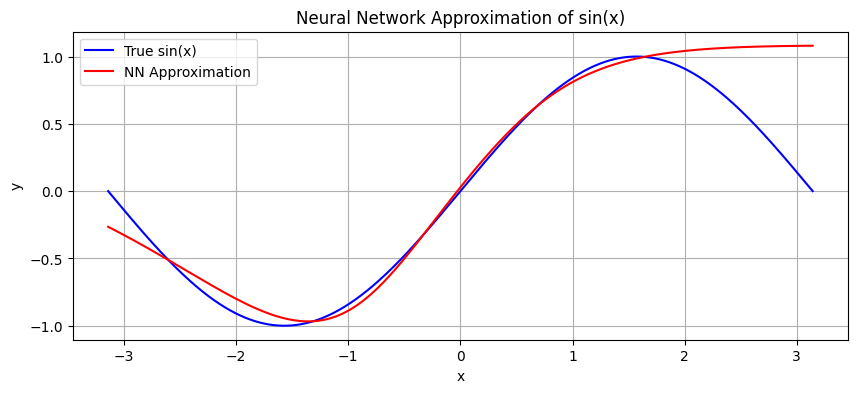


Train R² Score = 0.991274
Test  R² Score = -3.387599


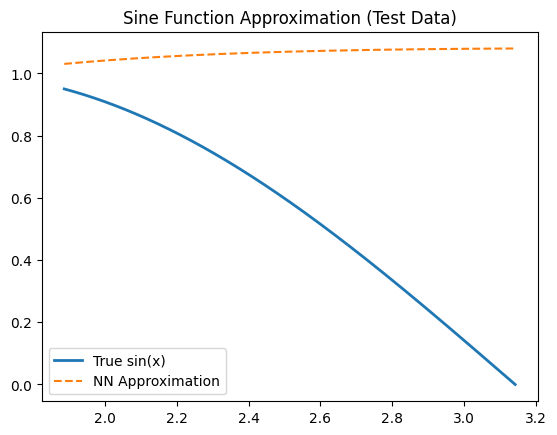

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate Data
np.random.seed(42)
x = np.linspace(-np.pi, np.pi, 2000).reshape(-1, 1)
y = np.sin(x)


# Shuffle before splitting
#indices = np.arange(len(x))
#np.random.shuffle(indices)
#x = x[indices]
#y = y[indices]
# spliting
split_idx = int(0.8 * len(x))
x_train, x_test = x[:split_idx], x[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# 2. Initialize Network Parameters
input_size = 1
hidden_size1 = 32
hidden_size2 = 16
output_size = 1
lr = 0.1  # learning rate

# Xavier initialization for tanh
def xavier_init(fan_in, fan_out):
    limit = np.sqrt(6 / (fan_in + fan_out))
    return np.random.uniform(-limit, limit, size=(fan_in, fan_out))

# Weights and biases
W1 = xavier_init(input_size, hidden_size1)
b1 = np.zeros((1, hidden_size1))

W2 = xavier_init(hidden_size1, hidden_size2)
b2 = np.zeros((1, hidden_size2))

W3 = xavier_init(hidden_size2, output_size)
b3 = np.zeros((1, output_size))


#  Activation function and its derivative
class Activation:
  def tanh(self,z):
    return np.tanh(z)
  def tanh_derivative(self,z):
    return 1 - np.tanh(z)**2
  def sigmoid(self,x):
    return 1 / (1 + np.exp(-x))
  def sigmoid_derivative(self,x):
    return Activation().sigmoid(x) * (1-Activation().sigmoid(x))

# Loss function
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# 3. Training Loop
epochs = 1000
for epoch in range(epochs):
    # ---- Forward pass ----
    a = Activation()
    z1 = x_train @  W1 + b1
    a1 = a.sigmoid(z1)

    z2 = a1 @ W2 + b2
    a2 = a.tanh(z2)

    z3 = a2 @ W3 + b3
    y_pred_train = z3  # Linear output

    # ---- Loss ----
    loss = mse_loss(y_train, y_pred_train)

    # ---- Backward pass ----
    dloss_dy = 2 * (y_pred_train - y_train) / y_train.shape[0]  # Derivative of MSE

    dW3 = a2.T @ dloss_dy
    db3 = np.sum(dloss_dy, axis=0, keepdims=True)

    da2 = dloss_dy @ W3.T
    dz2 = da2 * a.tanh_derivative(z2)
    dW2 = a1.T @ dz2
    db2 = np.sum(dz2, axis=0, keepdims=True)

    da1 = dz2 @ W2.T
    dz1 = da1 * a.sigmoid_derivative(z1)
    dW1 = x_train.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # Update weights
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2
    W3 -= lr * dW3
    b3 -= lr * db3

    # Print loss
    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss = {loss:.6f}")

# 5. Define prediction function
def predict(x_input):
    z1 = x_input @ W1 + b1
    a1 = a.sigmoid(z1)
    z2 = a1 @ W2 + b2
    a2 = a.tanh(z2)
    z3 = a2 @ W3 + b3
    return z3

# Predictions
y_pred_train = predict(x_train)
y_pred_test = predict(x_test)

# 6. R² Score
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)


# clear graph


# ---- Plot Full Prediction ----
# Predict on full (unshuffled) x
x_plot = np.linspace(-np.pi, np.pi, 2000).reshape(-1, 1)
y_plot = np.sin(x_plot)
y_pred_plot = predict(x_plot)

# Plot full sine approximation
plt.figure(figsize=(10, 4))
plt.plot(x_plot, y_plot, label='True sin(x)', color='blue')
plt.plot(x_plot, y_pred_plot, label='NN Approximation', color='red')
plt.title("Neural Network Approximation of sin(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# ---- Print R² scores ----
print(f"\nTrain R² Score = {r2_score(y_train, y_pred_train):.6f}")
print(f"Test  R² Score = {r2_score(y_test, y_pred_test):.6f}")

# Plot
plt.plot(x_test, y_test, label='True sin(x)', linewidth=2)
plt.plot(x_test, y_pred_test, label='NN Approximation', linestyle='--')
plt.legend()
plt.title("Sine Function Approximation (Test Data)")
plt.show()

Epoch 0, Loss = 0.387505
Epoch 500, Loss = 0.023328


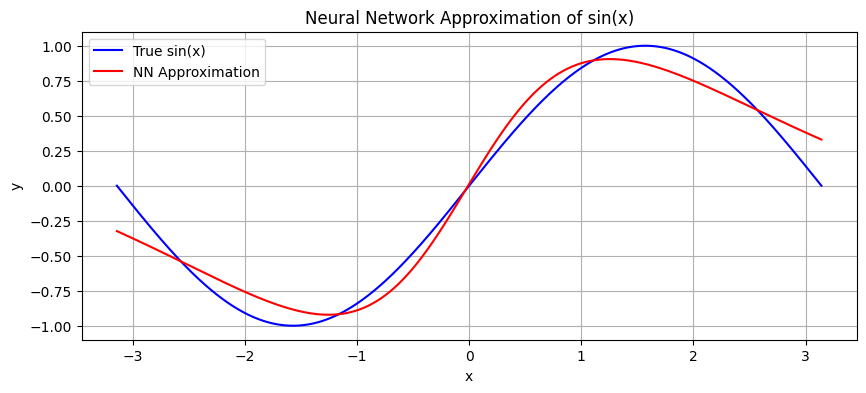

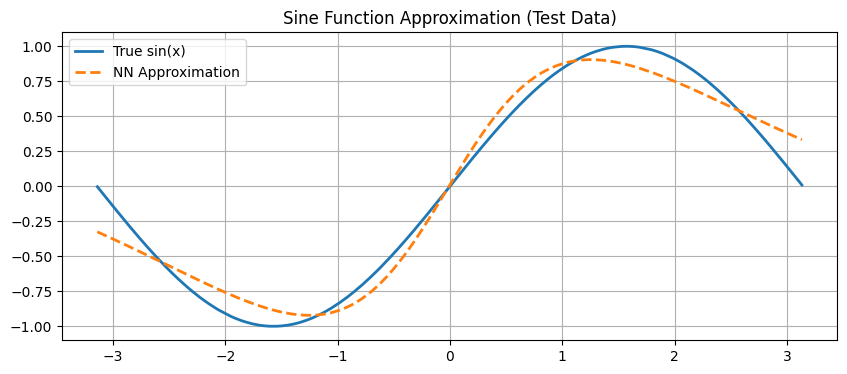

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate Data
np.random.seed(42)
x = np.linspace(-np.pi, np.pi, 2000).reshape(-1, 1)
y = np.sin(x)


# Shuffle before splitting
indices = np.arange(len(x))
np.random.shuffle(indices)
x = x[indices]
y = y[indices]
# spliting
split_idx = int(0.8 * len(x))
x_train, x_test = x[:split_idx], x[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# 2. Initialize Network Parameters
input_size = 1
hidden_size1 = 32
hidden_size2 = 16
output_size = 1
lr = 0.1  # learning rate

# Xavier initialization for tanh
def xavier_init(fan_in, fan_out):
    limit = np.sqrt(6 / (fan_in + fan_out))
    return np.random.uniform(-limit, limit, size=(fan_in, fan_out))

# Weights and biases
W1 = xavier_init(input_size, hidden_size1)
b1 = np.zeros((1, hidden_size1))

W2 = xavier_init(hidden_size1, hidden_size2)
b2 = np.zeros((1, hidden_size2))

W3 = xavier_init(hidden_size2, output_size)
b3 = np.zeros((1, output_size))


#  Activation function and its derivative
class Activation:
  def tanh(self,z):
    return np.tanh(z)
  def tanh_derivative(self,z):
    return 1 - np.tanh(z)**2
  def sigmoid(self,x):
    return 1 / (1 + np.exp(-x))
  def sigmoid_derivative(self,x):
    return Activation().sigmoid(x) * (1-Activation().sigmoid(x))

# Loss function
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# 3. Training Loop
epochs = 1000
for epoch in range(epochs):
    # ---- Forward pass ----
    a = Activation()
    z1 = x_train @  W1 + b1
    a1 = a.sigmoid(z1)

    z2 = a1 @ W2 + b2
    a2 = a.tanh(z2)

    z3 = a2 @ W3 + b3
    y_pred_train = z3  # Linear output

    # ---- Loss ----
    loss = mse_loss(y_train, y_pred_train)

    # ---- Backward pass ----
    dloss_dy = 2 * (y_pred_train - y_train) / y_train.shape[0]  # Derivative of MSE

    dW3 = a2.T @ dloss_dy
    db3 = np.sum(dloss_dy, axis=0, keepdims=True)

    da2 = dloss_dy @ W3.T
    dz2 = da2 * a.tanh_derivative(z2)
    dW2 = a1.T @ dz2
    db2 = np.sum(dz2, axis=0, keepdims=True)

    da1 = dz2 @ W2.T
    dz1 = da1 * a.sigmoid_derivative(z1)
    dW1 = x_train.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # Update weights
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2
    W3 -= lr * dW3
    b3 -= lr * db3

    # Print loss
    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss = {loss:.6f}")

# 5. Define prediction function
def predict(x_input):
    z1 = x_input @ W1 + b1
    a1 = a.sigmoid(z1)
    z2 = a1 @ W2 + b2
    a2 = a.tanh(z2)
    z3 = a2 @ W3 + b3
    return z3

# Predictions
y_pred_train = predict(x_train)
y_pred_test = predict(x_test)

# 6. R² Score
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)


# clear graph


# ---- Plot Full Prediction ----
# Predict on full (unshuffled) x
x_plot = np.linspace(-np.pi, np.pi, 2000).reshape(-1, 1)
y_plot = np.sin(x_plot)
y_pred_plot = predict(x_plot)

# Plot full sine approximation
plt.figure(figsize=(10, 4))
plt.plot(x_plot, y_plot, label='True sin(x)', color='blue')
plt.plot(x_plot, y_pred_plot, label='NN Approximation', color='red')
plt.title("Neural Network Approximation of sin(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# ---- Print R² scores ----
# Sort for cleaner plot
sorted_indices = np.argsort(x_test.flatten())
x_sorted = x_test[sorted_indices]
y_sorted = y_test[sorted_indices]
y_pred_sorted = y_pred_test[sorted_indices]

# Plot
plt.figure(figsize=(10, 4))
plt.plot(x_sorted, y_sorted, label='True sin(x)', linewidth=2)
plt.plot(x_sorted, y_pred_sorted, label='NN Approximation', linestyle='--', linewidth=2)
plt.legend()
plt.title("Sine Function Approximation (Test Data)")
plt.grid(True)
plt.show()
